In [1]:
def funA():
    x = 5
    def funB():
        x = 10
        print('funB: x =', x)
    funB()
    print('funA: x =', x)


funA()


funB: x = 10
funA: x = 5


In [2]:
def funA():
    x = 5
    def funB():
        nonlocal x
        x = 10
        print('funB: x =', x)
    funB()
    print('funA: x =', x)


funA()

funB: x = 10
funA: x = 10


### **LEGB**
L - Local  
E - Enclosing  
G - Global  
B - Built-in

107

## Closure

In [12]:
# how to use closure in Python
def power(exp):
    def exp_of(base):
        return base ** exp
    return exp_of


In [13]:
sqaure = power(2)
cube = power(3)

print(sqaure(2))
print(cube(2))
print(sqaure(5))
print(cube(5))

4
8
25
125


In [6]:
def outer():
    x = 0
    y = 0
    def inner(x1, y1):
        nonlocal x, y
        
        x += x1
        y += y1
        print(f'The value of x is {x} and y is {y}')
        
    return inner
        

In [8]:
move = outer()
move(1, 2)
move(-2, 2)

The value of x is 1 and y is 2
The value of x is -1 and y is 4


In [6]:
x = 100

def funA():
    x = 200
    def funB():
        nonlocal x # it will change the value of x in funA
        x = 300
        print("In funB, x = ", x)
    funB()
    print("In funA, x = ", x)

funA()
print("In main, x = ", x)

In funB, x =  300
In funA, x =  300
In main, x =  100


## Call function in other functions

In [10]:
def myfunc():
    print("Starting to call myfunc...")

def report(func):
    print("Starting to call function：", func.__name__)
    func()
    print("Function completed！")

report(myfunc)

Starting to call function： myfunc
Starting to call myfunc...
Function completed！


In [9]:
import time

def time_master(func):
    print('The program is running...')
    start = time.time()
    func()
    stop = time.time()
    print('The program is ceasing...')
    print(f'The duration is {(stop - start):.2f} sec')
    
    
def myfunc():
    time.sleep(2)
    print('Hello world!!')
    

time_master(myfunc)

The program is running...
Hello world!!
The program is ceasing...
The duration is 2.00 sec


## Use decorators in the functions 

In [8]:
import time

def time_master(func):
    def call_func():
        print('The program is running...')
        start = time.time()
        func()
        stop = time.time()
        print('The program is ceasing...')
        print(f'The duration is {(stop - start):.2f} sec')
    return call_func

# adding syntactic sugar
@time_master    
def myfunc():
    time.sleep(2)
    print('Hello world!!')
    
myfunc()

The program is running...
Hello world!!
The program is ceasing...
The duration is 2.00 sec


In [17]:
def a_decorator(f):                         # 函数作为参数被传入
    print(f"Function {f.__name__} is passed as the augument!")
    def additional_function(*args):         # 函数嵌套
        print("No. of input args is", len(args))
        contain_zero = any([x == 0 for x in args])
        print("Input arguments contain 0:", contain_zero)
        f(*args)    # 最终执行目标函数my_sum_function的地方
    return additional_function  # 函数作为返回对象

@a_decorator
def my_sum_function(*args):
    print("The sum is", sum(args))

my_sum_function(1, 2, 3, 4)

Function my_sum_function is passed as the augument!
No. of input args is 4
Input arguments contain 0: False
The sum is 10


In [16]:
def a_decorator(f):
    print(f"Function {f.__name__} is passed as the augument!")
    def additional_function(*args):
        print("No. of input args is", len(args))
        contain_zero = any([x == 0 for x in args])
        print("Input arguments contain 0:", contain_zero)
        f(*args)
    return additional_function

def my_sum_function(*args):
    print("The sum is", sum(args))

# a_decorator(my_sum_function)(1, 2, 3, 4)    # 注意理解这一行

# 上面的写法等价于下面的写法
mysun = a_decorator(my_sum_function)
mysun(1,2,3,4)

Function my_sum_function is passed as the augument!
No. of input args is 4
Input arguments contain 0: False
The sum is 10


## without syntactic sugar

In [11]:
import time

def time_master(func):
    def call_func():
        print('The program is running...')
        start = time.time()
        func()
        stop = time.time()
        print('The program is ceasing...')
        print(f'The duration is {(stop - start):.2f} sec')
    return call_func
    
  
def myfunc():
    time.sleep(2)
    print('Hello world!!')
    
myfunc = time_master(myfunc)()

The program is running...
Hello world!!
The program is ceasing...
The duration is 2.01 sec


## using **multiple** decorators

In [18]:
def add(func):
    def inner():
        x = func()
        return x + 1
    return inner

def square(func):
    def inner():
        x = func()
        return x ** 2
    return inner

def cube(func):
    def inner():
        x = func()
        return x ** 3
    return inner

@add
@square
@cube
def test():
    return 2

print(test())


65


In [1]:
def a(func):
    print('a is running')
    def inner():
        print('aaaaaa')
        func()
    return inner

def b(func):
    print('b is running')
    def inner():
        print('bbbbb')
        func()
    return inner


@b
@a
def main():
    print('main is running')
    
main()
    

a is running
b is running
bbbbb
aaaaaa
main is running


## decorators order
执行的时候是由内向外的，调用的时候是由外向内的
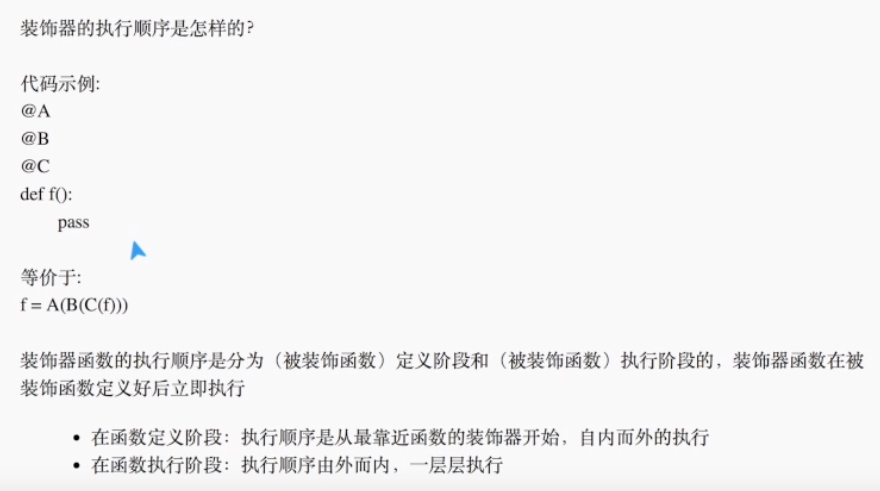

## 向装饰器传参数

In [28]:
import time 

def logger(msg):
    def time_master(func):
        def call_func():
            start = time.time()
            func()
            stop = time.time()
            print(f'[{msg}] costs {(stop - start):.2f}')
        return call_func
    return time_master

@logger(msg='A')
def funA():
    time.sleep(1)
    print('funA is running')

@logger(msg='B')    
def funB():
    time.sleep(1)
    print('funB is running')
    
# funA = logger(msg='A')(funA)
# funB = logger(msg='B')(funB)

funA()
funB()

funA is running
[A] costs 1.00
funB is running
[B] costs 1.00
